parameters using Normal Eq: [-1.2594  0.5907  0.3503  0.0286 -0.0165  0.1118  1.1894  0.0245]
Cost using Normal Eq: 0.00199345
Error using Normal Equtaion:  0.00184317
parameters using Gradient Descent:: [-1.2592  0.5902  0.3505  0.0286 -0.0165  0.1118  1.1895  0.0245]
Cost using Gradient Descent: 0.00199345
Error using Gradient Descent:  0.001843


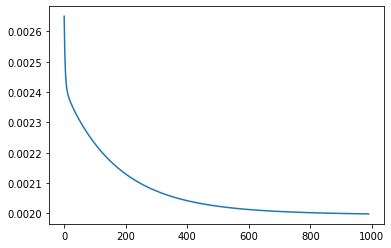

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
from sklearn.linear_model import LinearRegression

ip=pd.read_csv("datasets_14872_228180_Admission_Predict_Ver1.1.csv")
ip=ip.drop("Serial No.",axis=1)

def featureScale(x): return (x-np.average(x))/(x.std())
def cost(x,y,theta):
    J=np.average((x.dot(theta)-y)**2)
    return J/2
def grad(x,y,theta,alpha):
    val=theta - (alpha/y.size)*np.transpose(x).dot(x.dot(theta)-y)
    return val

y = np.array(ip['Chance of Admit '])


x = np.array(ip.loc[:, ip.columns != 'Chance of Admit '])
m=y.size
x=np.insert(x, 0, np.ones(m), axis=1)

x[:,1]/=340
x[:,2]/=120
x[:,[3,4,5]]/=5
x[:,6]/=10

xtrain=x[:400]
ytrain=y[:400]
xtest=x[400:]
ytest=y[400:]
numitr=100000
alpha=0.35
theta=np.array([0,1,1,1,1,1,1,1])


normeq=np.linalg.inv(np.transpose(xtrain).dot(xtrain)).dot(np.transpose(xtrain)).dot(ytrain)
print("parameters using Normal Eq:",np.around(normeq,decimals=4))
print("Cost using Normal Eq:",round(cost(xtrain,ytrain,normeq),8))
error=(xtest.dot(normeq)-ytest)**2
print("Error using Normal Equtaion: ",round(np.average(error),8))

J=[]
for i in range(numitr):
    if(i%10==0): J.append(cost(xtrain,ytrain,theta))
    theta=grad(xtrain,ytrain,theta,alpha)
print("parameters using Gradient Descent::",np.around(theta,decimals=4))
print("Cost using Gradient Descent:",round(J[-1],8))
error=(xtest.dot(theta)-ytest)**2
print("Error using Gradient Descent: ",round(np.average(error),6))

plt.plot(J[10:1000])
